<a href="https://colab.research.google.com/github/ilhamAdhim/Dicoding---Belajar-Pengembangan-Machine-Learning/blob/main/Submission_3_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Muhammad Ilham Adhim <br>
Submission 3 : **Image Classification Model Deployment**

# Importing libraries

In [ ]:
# Import libraries
import os, zipfile, shutil

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop, Adam

from google.colab import files

# Kaggle Setup

In [ ]:
# Install kaggle
!pip install -q kaggle

We are going to upload the kaggle.json that contains API Key to kaggle <br>
This can be found on **Profile > My Account > API**

In [ ]:
# Upload json file downloaded from your kaggle account
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
# Create kaggle directory and move the uploaded file to new folder
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [ ]:
# overwrite the read permission so that it can be accessed in google colab
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              235KB  2021-10-01 17:39:01          13071  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           7883  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           3432  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-07-03 18:37:20           3047  
fatiimaezzahra/famous-iconic-women                          Famous Iconic Wo

# Acquiring dataset and manage files 

In [ ]:
# Download datasets
!kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset

 96% 316M/330M [00:02<00:00, 144MB/s]
100% 330M/330M [00:02<00:00, 149MB/s]


In [ ]:
#Extract zip dataset 
!unzip /content/face-mask-12k-images-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Face Mask Dataset/Train/WithoutMask/1855.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1856.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1857.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1858.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1859.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1860.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1861.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1862.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1863.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1864.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1865.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1866.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1867.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1868.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1869.png  
  inflating: Face Mask Dataset/Train/WithoutMask/

In [ ]:
# Check the content of the unzipped files
shutil.move("/content/Face Mask Dataset","/content/Face_Mask_Dataset")
os.listdir('/content/Face_Mask_Dataset')

['Train', 'Test', 'Validation']

In [ ]:

print("Current files : \n")
print("Image with mask - Train \t\t : {}".format(len(os.listdir('/content/Face_Mask_Dataset/Train/WithMask'))))
print("Image without mask - Train \t\t : {}".format(len(os.listdir('/content/Face_Mask_Dataset/Train/WithoutMask'))))
print("=============================")
print("Image with mask - Validation \t\t : {}".format(len(os.listdir('/content/Face_Mask_Dataset/Validation/WithMask'))))
print("Image without mask - Validation \t : {}".format(len(os.listdir('/content/Face_Mask_Dataset/Validation/WithoutMask'))))
print("=============================")
print("Image with mask - Test \t\t\t : {}".format(len(os.listdir('/content/Face_Mask_Dataset/Test/WithoutMask'))))
print("Image without mask - Test \t\t : {}".format(len(os.listdir('/content/Face_Mask_Dataset/Test/WithMask'))))


Current files : 

Image with mask - Train 		 : 5000
Image without mask - Train 		 : 5000
Image with mask - Validation 		 : 400
Image without mask - Validation 	 : 400
Image with mask - Test 			 : 509
Image without mask - Test 		 : 483


These data separation for training, validation, and test set are not suitable with the requirement ( *80% train set dan 20% test set* )

In [ ]:
# Create a new folder to store all images from Train and validation for both images with mask and without mask
!mkdir dataset

In [ ]:
!cp -rf /content/Face_Mask_Dataset/Train/* -d dataset
!cp -rf /content/Face_Mask_Dataset/Validation/* -d dataset

In [ ]:
# Check the image amount of the copied dataset
print("Current files : \n")
print("Image with mask - \t\t : {}".format(len(os.listdir('/content/dataset/WithMask'))))
print("Image without mask - \t\t : {}".format(len(os.listdir('/content/dataset/WithoutMask'))))

Current files : 

Image with mask - 		 : 5400
Image without mask - 		 : 5400


# Data Preprocessing

In [ ]:
# Image augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    rotation_range=30,
    horizontal_flip = True,
    fill_mode="nearest",
    validation_split=0.2
)

In [ ]:
# Split new dataset from folder dataset
training_dataset = datagen.flow_from_directory('/content/dataset',
                                                        subset='training',
                                                        target_size=(120,120),
                                                        batch_size=64,
                                                        class_mode='binary',
                                                        interpolation='nearest',
                                                        classes=['WithoutMask','WithMask'])

validation_dataset = datagen.flow_from_directory('/content/dataset',
                                                        subset='validation',
                                                        target_size=(120,120),
                                                        batch_size=64,
                                                        class_mode='binary',
                                                        interpolation='nearest',
                                                        classes=['WithoutMask','WithMask'])

Found 8640 images belonging to 2 classes.
Found 2160 images belonging to 2 classes.


# Create model with CNN Architecture

In [ ]:
# Creating model
model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(120, 120, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.6),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(256, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.4),

    Flatten(),

    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the model with RMSprop optimizer and binary_crossentropy as its loss function
model.compile(
    optimizer = RMSprop(),
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
# Callback : if the accuracy is more than 92%, then stop
class customCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.92):
      print("\Accuracy is above >92%!")
      self.model.stop_training = True
callbacks = customCallback()

In [ ]:
# Model Fitting
result = model.fit(
    training_dataset,
    validation_data=validation_dataset,
    callbacks=[callbacks],
    epochs=25,
)

Epoch 1/25
135/135 [==============================] - 391s 3s/step - loss: 0.4622 - accuracy: 0.8297 - val_loss: 0.5252 - val_accuracy: 0.7681
Epoch 2/25
135/135 [==============================] - 382s 3s/step - loss: 0.1873 - accuracy: 0.9329 - val_loss: 0.3699 - val_accuracy: 0.8407
\Accuracy is above >92%!


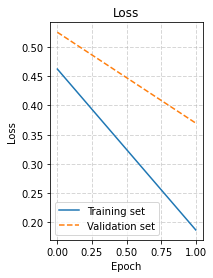

In [ ]:
acc = result.history['accuracy']
val_acc = result.history['val_accuracy']

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(loss, label='Training set')
plt.plot(val_loss, label='Validation set', linestyle='--')
plt.legend()
plt.grid(linestyle='--', linewidth=1, alpha=0.5)

plt.show()


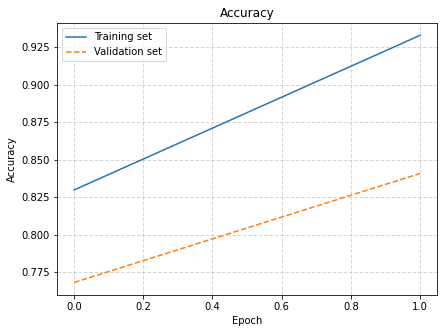

In [ ]:
# Get loss accuracy from history
loss = result.history['loss']
val_loss = result.history['val_loss']

# Display loss graph and accuracy
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(acc, label='Training set')
plt.plot(val_acc, label='Validation set', linestyle='--')
plt.legend()
plt.grid(linestyle='--', linewidth=1, alpha=0.5)


plt.show()

# Export to TF LITE

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpg4tkyn_z/assets


INFO:tensorflow:Assets written to: /tmp/tmpg4tkyn_z/assets


In [ ]:
#save model in .tflite format
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)